In [3]:
#Let's first import required Python packages.
#Importing required Python packages
import matplotlib.pylab as plt
import numpy as np
from scipy import sparse
from sklearn.datasets import make_classification, make_blobs, load_boston
from sklearn.decomposition import PCA
from sklearn.cross_validation import ShuffleSplit, train_test_split#, Bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from pprint import pprint
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import urllib
import seaborn
np.random.seed(sum(map(ord, "aesthetics")))
seaborn.set_context('notebook')
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 25)
pd.options.display.max_colwidth = 50
%matplotlib inline

/Anaconda/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Anaconda/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Anaconda/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
traincsv=pd.read_csv('train.csv', index_col='Id')
testcsv=pd.read_csv('test.csv', index_col='Id')
orig_traincsv = traincsv.copy()
orig_testcsv = testcsv.copy()

In [5]:
traincsv.head(2)

    Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2596      51      3                               258   
2        2590      56      2                               212   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                                0                              510   
2                               -6                              390   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             221             232            148   
2             220             235            151   

    Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
Id                                                                           
1                                 6279                 1                 0   
2      

In [6]:
traincsv[traincsv.isnull().any(axis=1)]

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 55 columns]

In [9]:
#Initial Random Forest Model fitting with 1000 estimators. Note below, that the labels lie in the last column, Cover Type.
rf_initial=RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)
rf_initial.fit(traincsv.ix[:,:-1].values, traincsv.iloc[:,-1:].values.ravel())
print "Initial Traincsv score: %.2f" %rf_initial.score(traincsv.iloc[:,:-1].values, traincsv.iloc[:,-1:].values.ravel())

Initial Traincsv score: 1.00


In [24]:
#Always call fit on the estimator before invoking this method.
def importances(estimator, col_array, title):
# Calculate the feature ranking - Top 10
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]
    print "%s Top 20 Important Features\n" %title
    for f in range(20):
        print("%d. %s (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]]))
#Mean Feature Importance
        print "\nMean Feature Importance %.6f" %np.mean(importances)
#Plot the feature importances of the forest
    indices=indices[:10]
    plt.figure()
    plt.title(title+" Top 10 Feature importances")
    plt.bar(range(10), importances[indices],
    color="gr", align="center")
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90)
    plt.xlim([-1, 10])
    plt.show()

Cover Type (Initial RF) Top 20 Important Features

1. Elevation (0.226674)

Mean Feature Importance 0.018519
2. Horizontal_Distance_To_Roadways (0.092598)

Mean Feature Importance 0.018519
3. Horizontal_Distance_To_Fire_Points (0.073811)

Mean Feature Importance 0.018519
4. Horizontal_Distance_To_Hydrology (0.062130)

Mean Feature Importance 0.018519
5. Vertical_Distance_To_Hydrology (0.053841)

Mean Feature Importance 0.018519
6. Hillshade_9am (0.051535)

Mean Feature Importance 0.018519
7. Aspect (0.049485)

Mean Feature Importance 0.018519
8. Hillshade_3pm (0.046268)

Mean Feature Importance 0.018519
9. Hillshade_Noon (0.044644)

Mean Feature Importance 0.018519
10. Wilderness_Area4 (0.043084)

Mean Feature Importance 0.018519
11. Slope (0.036259)

Mean Feature Importance 0.018519
12. Soil_Type10 (0.022820)

Mean Feature Importance 0.018519
13. Soil_Type38 (0.019145)

Mean Feature Importance 0.018519
14. Wilderness_Area1 (0.018641)

Mean Feature Importance 0.018519
15. Soil_Type3 (0

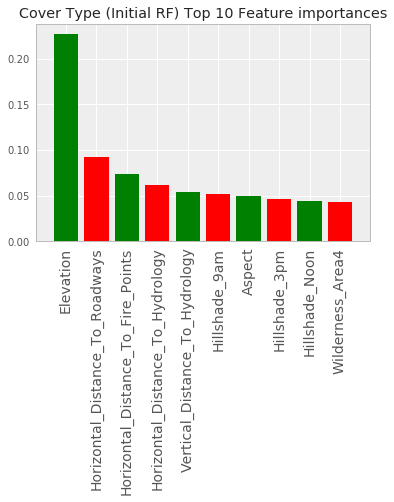

In [25]:
#Call the method we just created to display the feature importances
importances(rf_initial, traincsv, "Cover Type (Initial RF)")